In [49]:
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore") 
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [50]:
#Filepath = 'C:/Users/ChowdhKa/Downloads/Kakoli Masters/MRP/dat1/'
Filepath = 'C:/Users/ChowdhKa/Downloads/Kakoli Masters/MRP/All File/'

In [51]:
#read csv
df=pd.read_csv(Filepath+'OctDataSmall.csv')
df.columns = ['StartDate', 'EndDate', 'Channel', 'Pwr_dbm','Snr', 'Occupancy']
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['StartDate'] = df['StartDate'].values.astype('<M8[h]')
df['EndDate'] = df['EndDate'].values.astype('<M8[h]')
df.head()

,StartDate,EndDate,Channel,Pwr_dbm,Snr,Occupancy
0,2016-10-06,2016-10-06 01:00:00,56303,-83.293709,21.397917,100.0
1,2016-10-06,2016-10-06 01:00:00,56304,-63.193748,41.497952,100.0
2,2016-10-06,2016-10-06 01:00:00,56305,-31.322813,73.445999,100.0
3,2016-10-06,2016-10-06 01:00:00,56306,-64.096245,41.568588,100.0
4,2016-10-06,2016-10-06 01:00:00,56307,-83.440269,21.249647,100.0


In [52]:
#putting dataframe in another dataframe 
dataf = df

In [53]:
# Take the data frame from R file
df_merged=pd.read_csv(Filepath+'testcsv.csv',delimiter="\t")
df_merged.columns = ['Channel','StartDate', 'EndDate', 'Pwr_dbm','Snr', 'Occupancy','per_read']
df_merged['StartDate'] = pd.to_datetime(df_merged['StartDate'])
df_merged['EndDate'] = pd.to_datetime(df_merged['EndDate'])
df_merged['StartDate'] = df_merged['StartDate'].values.astype('<M8[h]')
df_merged['EndDate'] = df_merged['EndDate'].values.astype('<M8[h]')
df_merged.head()

,Channel,StartDate,EndDate,Pwr_dbm,Snr,Occupancy,per_read
1,10,2016-10-07 08:00:00,2016-10-07 09:00:00,-91.500000,11.700000,0.074493,82.82504
2,10,2016-10-21 21:00:00,2016-10-21 22:00:00,-90.774193,12.806452,0.466165,82.82504
3,10,2016-10-11 01:00:00,2016-10-11 02:00:00,-91.592590,11.444445,0.203912,82.82504
4,10,2016-10-21 12:00:00,2016-10-21 13:00:00,-91.340424,11.851064,0.352800,82.82504
5,10,2016-10-20 23:00:00,2016-10-21 00:00:00,-92.064514,11.580646,0.237639,82.82504


In [54]:
# Taking only the required columns
df_merged = df_merged[['Channel','StartDate', 'EndDate', 'Occupancy']]

In [55]:
#Getting the final channel list

channel = df_merged.Channel.unique().tolist()
channelList = np.random.choice(channel, 300, replace=False)

In [56]:
channelList.tolist()

[51162,
 8181,
 51044,
 50084,
 4870,
 56088,
 30670,
 54508,
 50186,
 52756,
 51602,
 51097,
 24670,
 51350,
 55292,
 55211,
 7810,
 4160,
 55246,
 51410,
 56298,
 51117,
 50708,
 52718,
 51369,
 51421,
 51472,
 50514,
 50606,
 51478,
 9960,
 55226,
 32160,
 52695,
 6461,
 51176,
 51081,
 50255,
 50748,
 52936,
 6721,
 51414,
 50861,
 55680,
 56265,
 29720,
 52190,
 55216,
 56359,
 6600,
 8251,
 5780,
 51470,
 51664,
 55484,
 56421,
 8641,
 54462,
 56195,
 54449,
 6861,
 50135,
 54450,
 54459,
 50798,
 28930,
 7651,
 55251,
 52741,
 10420,
 55272,
 50260,
 56375,
 6801,
 50604,
 55720,
 50630,
 21640,
 51049,
 56390,
 55712,
 50680,
 50510,
 641,
 56374,
 51150,
 12160,
 51312,
 50762,
 15610,
 55698,
 6481,
 50488,
 25710,
 670,
 50975,
 30700,
 56292,
 50397,
 9531,
 51433,
 50130,
 31900,
 15260,
 55509,
 51304,
 3160,
 56232,
 50309,
 50193,
 56304,
 55256,
 54445,
 51062,
 51474,
 51101,
 4050,
 55262,
 26360,
 50797,
 50471,
 50381,
 4010,
 50173,
 51344,
 51665,
 20720,
 50447,

In [57]:
#channelList = [20750,22320,23200,28430,34680,34690,50267,15220,15530,15570,15820,16010,16130]#,
               #21340,24220,25410,53970,54006,54494,54620,56097,56293,56305,56306,56307]

In [58]:
#channelList = [20750,22320,23200,28430]
               #,34680,34690,50267,15220,15530,15570,15820,16010,16130,
               #21340,24220,25410,53970,54006,54494,54620,56097,56293,56305,56306,56307]

In [59]:
OriginalMergedDF = df_merged

In [60]:
def ProcessDF(channel, threshold):
    InterDF = OriginalMergedDF[(OriginalMergedDF.Channel == channel)][['StartDate', 'EndDate', 'Channel', 'Occupancy']]
    InterDF = InterDF.set_index('StartDate')
    InterDF = InterDF.sort_index()
    indexStart = InterDF.index[0]
    indexEnd = InterDF.index[-1]
    InterDF= InterDF.reindex(pd.date_range(start=indexStart, end=indexEnd, freq='1h'))
    shiftVales = 2
    InterDF['Occupancy1'] = InterDF['Occupancy'].shift()
    while shiftVales <=6:
        InterDF['Occupancy'+str(shiftVales)] = InterDF['Occupancy'+str(shiftVales-1)].shift()
        shiftVales=shiftVales+1
    # Convert index back to dataframe column
    InterDF.reset_index(level=0, inplace=True)
    InterDF.drop(InterDF.columns[[0,1]], axis=1, inplace=True)
    InterDF = InterDF.dropna(how='any', axis = 0)
    #InterDF['OccupancyLabel'] = np.where(InterDF['Occupancy'] > threshold, 1,0)
    InterDF['OccupancyLabel'] = pd.cut(InterDF['Occupancy'], [-np.inf, threshold, np.inf], labels=[0, 1])
    return InterDF

In [61]:
def GausNB(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    confusion_NB = confusion_matrix(y_test, predicted, labels=[0,1])
    # Accuracy
    scoreNB = accuracy_score(y_test, predicted)
    # Sensitivity
    senseNB = confusion_NB[1,1]/(confusion_NB[1,0]+confusion_NB[1,1])
    # Specificity
    specificNB = confusion_NB[0,0]/(confusion_NB[0,0]+confusion_NB[0,1])
    # F-measure
    fmeasureNB = f1_score(y_test, predicted,average='weighted')

    return scoreNB, senseNB, specificNB, fmeasureNB

In [62]:
def LogReg(X_train, y_train, X_test, y_test):
    reg = LogisticRegression()
    modfit = reg.fit(X_train, y_train)
    yPred = modfit.predict(X_test)
    confusion_LR = confusion_matrix(y_test, yPred, labels=[0,1])
    # Accuracy
    #scoreLR = modfit.score(X_test, yPred)
    scoreLR = (confusion_LR[0,0]+confusion_LR[1,1])/(confusion_LR[0,0]+confusion_LR[0,1]+confusion_LR[1,0]+confusion_LR[1,1])
    # Sensitivity
    senseLR = confusion_LR[1,1]/(confusion_LR[1,0]+confusion_LR[1,1])
    # Specificity
    specificLR = confusion_LR[0,0]/(confusion_LR[0,0]+confusion_LR[0,1])
    # F-measure
    fmeasureLR = f1_score(y_test, yPred, average='weighted')
    return scoreLR, senseLR, specificLR, fmeasureLR

In [63]:
#print(k[1])

In [64]:
# Defining the threshold for class labeling
SaveDataDF = pd.DataFrame([])
list_threshold = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
#list_threshold = [40, 50, 60, 70]
for t in list_threshold:
#t = 50
    for channel in channelList:
        #print('Value of Threshold: ' + str(t))
        #print('Current channel is: '+ str(channel))

        ProcessedDF = ProcessDF(channel, t)
        ProcessedDFx = ProcessedDF[(ProcessedDF.Channel == channel)][['Channel', 'Occupancy1', 'Occupancy2', 'Occupancy3', 'Occupancy4', 'Occupancy5', 'Occupancy6']]
        ProcessedDFy = ProcessedDF[(ProcessedDF.Channel == channel)][['OccupancyLabel']] 
        #print(ProcessedDFy.OccupancyLabel.unique())
        #print(ProcessedDFy['OccupancyLabel'].value_counts())
        k = ProcessedDFy.groupby('OccupancyLabel').size()
        #print('k[0]: '+ str(k[0]))
        #print('k[1]: '+ str(k[1]))
        if (k[0] > 5 and k[1] > 5):
            RunIter = 1
            while RunIter <= 10:
                foldCounter = 1
                kc = KFold(n_splits = 10, shuffle=True)
                for train_x, test_x in kc.split(ProcessedDFx, ProcessedDFy):
                    X_trainDF, X_testDF = ProcessedDFx.iloc[train_x], ProcessedDFx.iloc[test_x]
                    y_trainDF, y_testDF = ProcessedDFy.iloc[train_x], ProcessedDFy.iloc[test_x]


                    # Naive Bayes
                    scoreNB, sensitivityNB, specificityNB, fmeasureNB = GausNB(X_trainDF, y_trainDF, X_testDF, y_testDF)
                    #if len(y_trainDF.OccupancyLabel.unique()) > 1:
                    # Logistic Regression
                    scoreLR, sensitivityLR, specificityLR, fmeasureLR = LogReg(X_trainDF, y_trainDF, X_testDF, y_testDF)

                    # PRINT ROW VALUE IN DATAFRAME- KEEP APPENDING
                    SaveDataDF = SaveDataDF.append(pd.DataFrame({'Channel': channel, 'Threshold': t,
                                                                 'RunCount': RunIter,'FoldCount': foldCounter,
                                                                 'AccuracyLR': scoreLR, 'SensitivityLR': sensitivityLR,
                                                                 'SpecificityLR': specificityLR, 'AccuracyNB': scoreNB,
                                                                 'SensitivityNB': sensitivityNB, 'SpecificityNB': specificityNB,
                                                                 'fmeasureNB': fmeasureNB, 'fmeasureLR': fmeasureLR
                                                                }, 
                                                                index=[0]), ignore_index=True)
                foldCounter = foldCounter + 1
                RunIter = RunIter + 1


In [65]:
 # k = ProcessedDFy.groupby(['OccupancyLabel']).size()
#ProcessedDFy = ProcessedDF[(ProcessedDF.Channel == channel)][['OccupancyLabel']]
#k = ProcessedDFy.groupby(['OccupancyLabel']).size()
ProcessedDFy.head()

,OccupancyLabel
6,0
7,0
8,0
9,0
10,0


In [66]:
ProcessedDFx.head()

,Channel,Occupancy1,Occupancy2,Occupancy3,Occupancy4,Occupancy5,Occupancy6
6,11861.0,0.364548,0.452455,0.409622,1.043530,1.481537,0.960179
7,11861.0,0.454444,0.364548,0.452455,0.409622,1.043530,1.481537
8,11861.0,0.238628,0.454444,0.364548,0.452455,0.409622,1.043530
9,11861.0,0.677012,0.238628,0.454444,0.364548,0.452455,0.409622
10,11861.0,1.012562,0.677012,0.238628,0.454444,0.364548,0.452455


In [67]:
SaveDataDF.head()

,AccuracyLR,AccuracyNB,Channel,FoldCount,RunCount,SensitivityLR,SensitivityNB,SpecificityLR,SpecificityNB,Threshold,fmeasureLR,fmeasureNB
0,0.918367,0.816327,54508,1,1,1.000000,0.822222,0.000000,0.750000,10,0.879288,0.851438
1,0.959184,0.816327,54508,1,1,1.000000,0.804348,0.333333,1.000000,10,0.949414,0.861470
2,0.918367,0.775510,54508,1,1,1.000000,0.750000,0.200000,1.000000,10,0.892931,0.818270
3,0.877551,0.714286,54508,1,1,0.953488,0.720930,0.333333,0.666667,10,0.866698,0.760424
4,0.897959,0.816327,54508,1,1,0.976744,0.790698,0.333333,1.000000,10,0.882672,0.844951


In [68]:
SaveDataDF.to_csv(Filepath+'OutputData.csv', header=False,sep='\t', encoding='utf-8', index=False)

In [69]:
readResults = pd.read_csv(Filepath+'OutputData.csv', header=1, sep ='\t')

In [70]:
readResults.columns = ['AccuracyLR', 'AccuracyNB', 'Channel', 'FoldCount', 'RunCount', 
                    'SensitivityLR', 'SensitivityNB','SpecificityLR', 
                    'SpecificityNB','Threshold','FmeasureLR', 'FmeasureNB']

In [71]:
readResults.head()

,AccuracyLR,AccuracyNB,Channel,FoldCount,RunCount,SensitivityLR,SensitivityNB,SpecificityLR,SpecificityNB,Threshold,FmeasureLR,FmeasureNB
0,0.918367,0.775510,54508,1,1,1.000000,0.750000,0.200000,1.000000,10,0.892931,0.818270
1,0.877551,0.714286,54508,1,1,0.953488,0.720930,0.333333,0.666667,10,0.866698,0.760424
2,0.897959,0.816327,54508,1,1,0.976744,0.790698,0.333333,1.000000,10,0.882672,0.844951
3,0.816327,0.816327,54508,1,1,0.975610,0.878049,0.000000,0.500000,10,0.752121,0.820595
4,0.958333,0.854167,54508,1,1,0.977778,0.866667,0.666667,0.666667,10,0.958333,0.883021


In [72]:
readResults = readResults.drop(['FoldCount', 'RunCount'], 1)

In [73]:
PerThresPerChannelDF = readResults.groupby(['Channel','Threshold']).mean().add_suffix('_mean').reset_index()

In [74]:
PerThresPerChannelDF.head()

,Channel,Threshold,AccuracyLR_mean,AccuracyNB_mean,SensitivityLR_mean,SensitivityNB_mean,SpecificityLR_mean,SpecificityNB_mean,FmeasureLR_mean,FmeasureNB_mean
0,670,10,0.830748,0.715468,0.889360,0.631180,0.700970,0.902205,0.828853,0.725878
1,670,20,0.908027,0.898151,0.035690,0.101230,0.985984,0.968613,0.878521,0.880497
2,670,30,0.982908,0.960094,0.006289,0.166667,0.997086,0.971926,0.977443,0.967188
3,1050,10,0.861764,0.803146,0.474302,0.683135,0.946512,0.828961,0.850743,0.817364
4,1051,10,0.915706,0.885030,0.538552,0.621972,0.966487,0.921381,0.910189,0.889912


In [75]:
PerThresPerChannelDF = PerThresPerChannelDF.drop(['Channel'], 1)
FinalResultsDF = PerThresPerChannelDF.groupby(['Threshold']).mean().reset_index()

In [76]:
FinalResultsDF

,Threshold,AccuracyLR_mean,AccuracyNB_mean,SensitivityLR_mean,SensitivityNB_mean,SpecificityLR_mean,SpecificityNB_mean,FmeasureLR_mean,FmeasureNB_mean
0,10,0.912276,0.850891,0.718232,0.700138,0.807317,0.872888,0.905309,0.860044
1,20,0.907481,0.860258,0.690025,0.740761,0.841155,0.864254,0.900618,0.867703
2,30,0.935061,0.889820,0.689405,0.756751,0.838890,0.878996,0.929774,0.899280
3,40,0.932570,0.886423,0.754103,0.804096,0.844186,0.858678,0.928928,0.895124
4,50,0.936315,0.896434,0.780483,0.835689,0.848570,0.853506,0.932502,0.903773
5,60,0.941719,0.899335,0.769683,0.840614,0.854400,0.842234,0.937419,0.907180
6,70,0.951066,0.906417,0.771056,0.844553,0.855764,0.843209,0.947197,0.915325
7,80,0.947856,0.907594,0.848048,0.865178,0.769701,0.809327,0.944764,0.914987
8,90,0.950492,0.897625,0.771060,0.885122,0.866860,0.831872,0.946427,0.908857


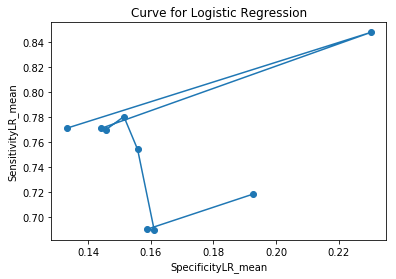

In [77]:
plt.plot(1- FinalResultsDF['SpecificityLR_mean'],FinalResultsDF['SensitivityLR_mean'], '-o')
plt.ylabel('SensitivityLR_mean')
plt.xlabel('SpecificityLR_mean')
plt.title('Curve for Logistic Regression')
plt.show()

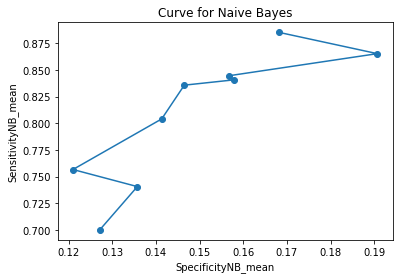

In [78]:
plt.plot(1- FinalResultsDF['SpecificityNB_mean'],FinalResultsDF['SensitivityNB_mean'], '-o')
plt.ylabel('SensitivityNB_mean')
plt.xlabel('SpecificityNB_mean')
plt.title('Curve for Naive Bayes')
plt.show()

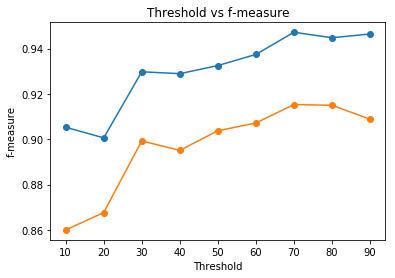

In [79]:
plt.plot(FinalResultsDF['Threshold'],FinalResultsDF['FmeasureLR_mean'], '-o')
plt.plot(FinalResultsDF['Threshold'],FinalResultsDF['FmeasureNB_mean'], '-o')
plt.ylabel('f-measure')
plt.xlabel('Threshold')
plt.title('Threshold vs f-measure')
plt.show()

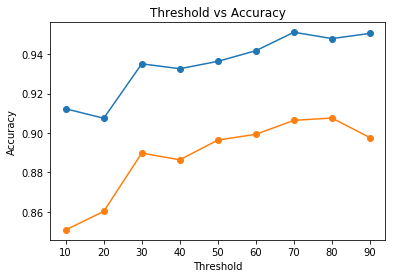

In [80]:
plt.plot(FinalResultsDF['Threshold'],FinalResultsDF['AccuracyLR_mean'], '-o')
plt.plot(FinalResultsDF['Threshold'],FinalResultsDF['AccuracyNB_mean'], '-o')
plt.ylabel('Accuracy')
plt.xlabel('Threshold')
plt.title('Threshold vs Accuracy')
plt.show()